In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

# 차원 축소

- 과일 사진의 경우는 10000개의 픽셀이 있기 떄문에 10000개의 특성이 있음

- 차원의 저주
    - 일반적인 머신러닝 문제는 수천 ~ 수백만개의 특성을 가지는 경우도 있음
    - 특성이 너무 많으면 훈련이 느리게 될 뿐만 아니라 좋은 솔루션을 찾기 어렵게 됨
    - 이러한 문제를 차원의 저주(curse of dimensionality)라고 함
    
- 차원 축소(dimensionality reduction)
    - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 모델의 성능을 향상시키는 방법
        - 예) 이미지 경계면의 배경 부분 제거, 서로 인접한 픽셀들을 결합 등

## 주성분 분석(principal component analysis)

- 데이터에 있는 분산이 큰 방향을 찾는 것
    - 분산 : 데이터가 퍼져있는 정도
<img src = "./img/pca1.gif">

- 위 그림의 데이터에서는 오른쪽 위를 향하는 분산이 가장 큼
- 원본 데이터를 가장 잘 설명하는 방향이 주성분(principal component)
    - 주성분은 데이터가 가진 특성을 가장 잘 나타내기 때문에 주성분에 데이터를 투영하면 정보의 손실을 줄이면서 차원을 축소할 수 있음
<img src = "./img/pca2.png">

In [2]:
fruits = np.load("./data/fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
pca = PCA(n_components = 50) # n_components : 주성분의 개수
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# pca가 찾은 주성분 확인
print(pca.components_.shape)

(50, 10000)


In [10]:
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플 수
    
    # 한 줄에 10개 씩 이미지를 그를 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n/10))
    cols = 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), squeeze = False)
    
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap = "gray_r")
            axs[i, j].axis("off")
    plt.show()

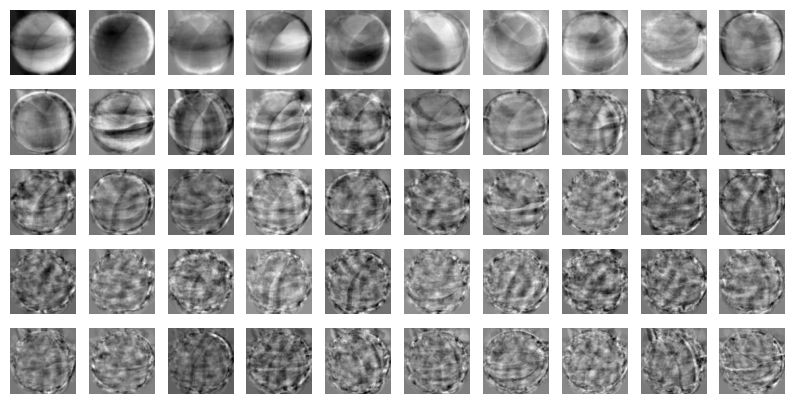

In [11]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타냄
    - 데이터셋에 있는 특징을 찾아낸 것

In [13]:
print(fruits_2d.shape)

(300, 10000)


In [12]:
# 원본 데이터의 차원을 50차원으로 축소
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

- 10000개의 특성을 50개로 줄이면 정보 손실이 없을 수는 없지만 정보 손실을 최소한으로 했기 때문에 축소된 데이터에서 원본 데이터에 가깝게 복수할 수는 있음

In [14]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


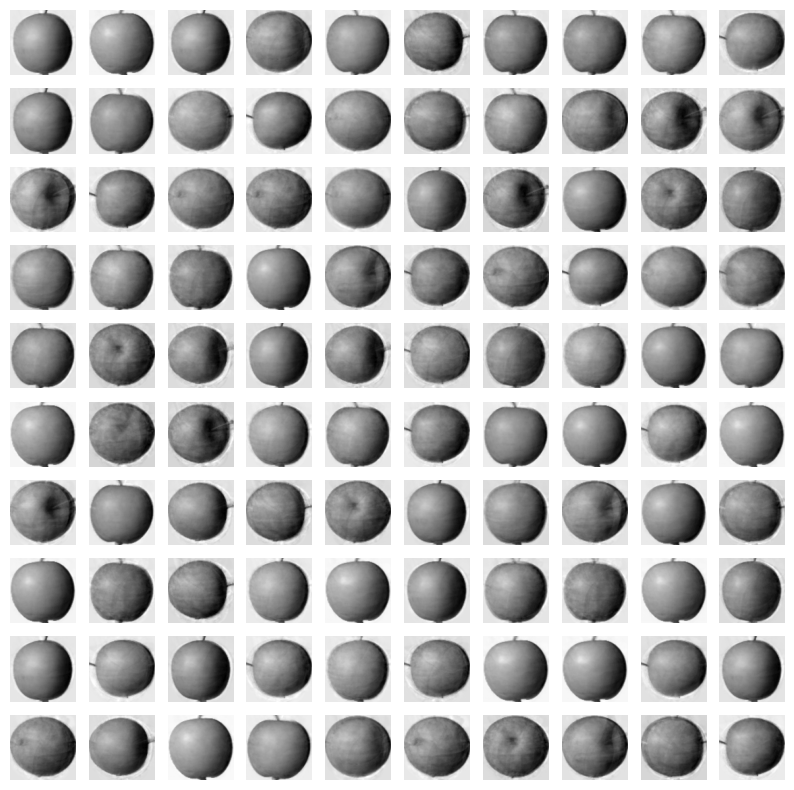

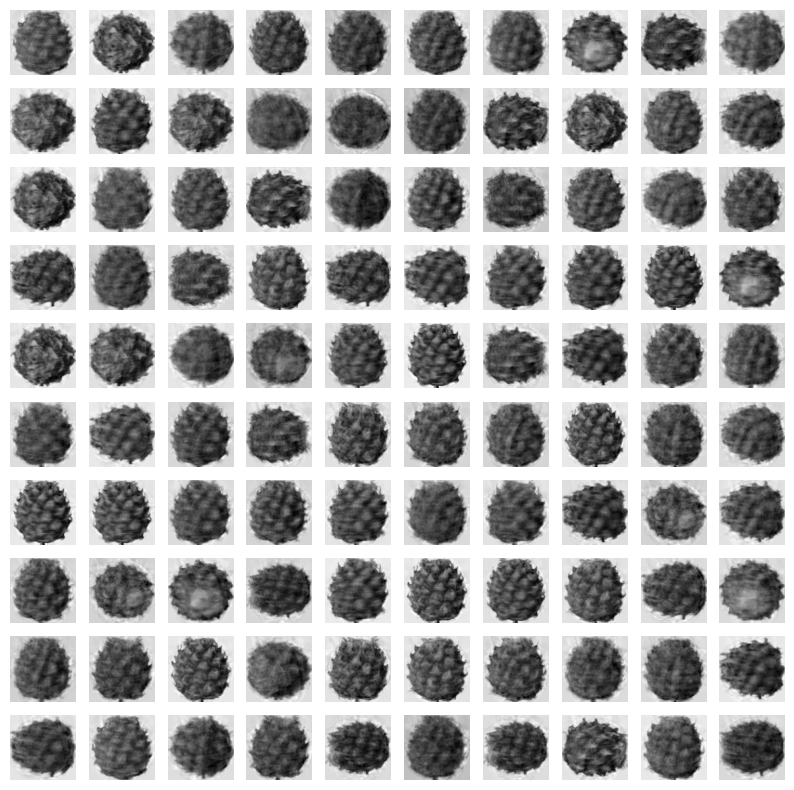

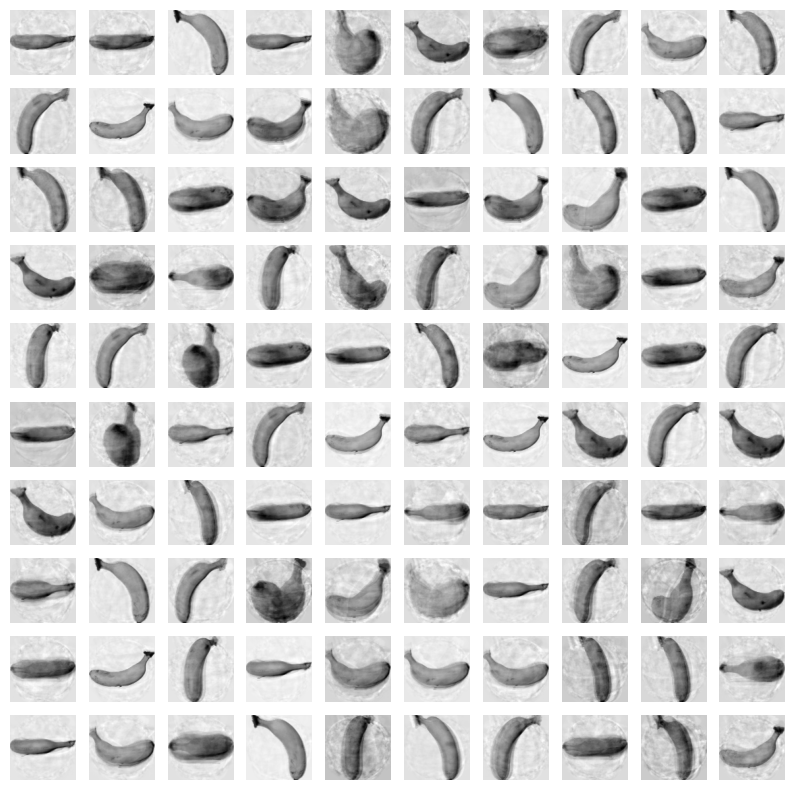

In [15]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start : start+100])
    print()

## 설명된 분산(explained variance)

- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지를 기록한 값
- pca 클래스의 explained_variance_ratio_ 에 설명된 분산 비율이 기록되어 있음

In [16]:
# 50개의 주성분으로 표현하고 있는 총 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9215558273166939


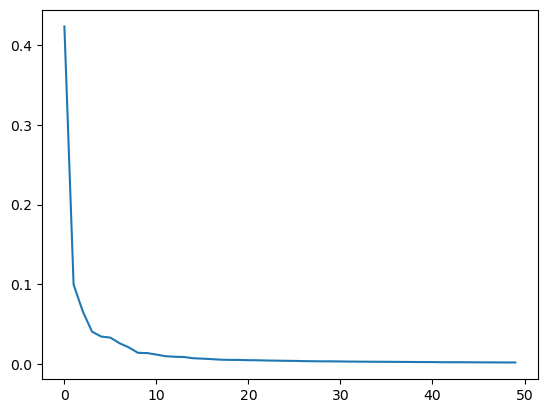

In [17]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

In [18]:
# 레이블 생성
# 사과 = 0, 파인애플 = 1, 바나나 = 2
Y = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [19]:
lr = LogisticRegression()

In [20]:
# 원본 데이터로 성능 테스트
scores = cross_validate(lr, fruits_2d, Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
1.0132749557495118


In [21]:
# pca로 축소한 데이터로 성능 테스트
scores = cross_validate(lr, fruits_pca, Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

1.0
0.022714710235595702


### 설명된 분산의 비율로 pca 사용

In [24]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 설정
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [25]:
# 2개의 특성만으로 원본 데이터 분산의 50%를 표현할 수 있음
print(pca.n_components_)

2


In [26]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [27]:
scores = cross_validate(lr, fruits_pca, Y)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.99
0.035941362380981445


C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### 차원 축소 데이터로 kmeans 사용

In [28]:
km = KMeans(n_clusters = 3, random_state = 4)

In [29]:
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yjg10\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


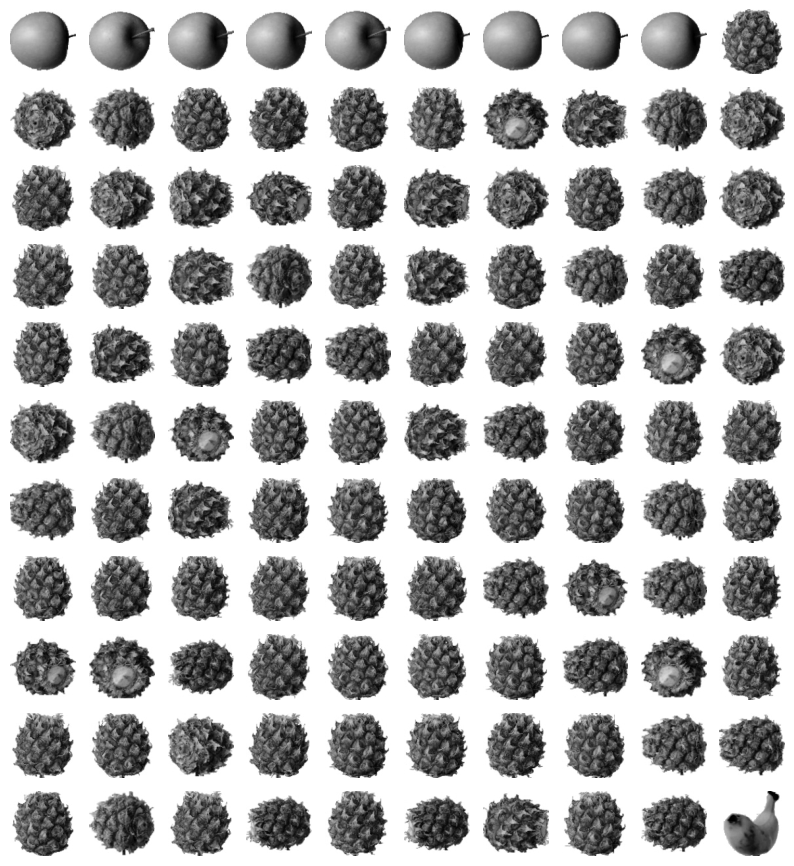

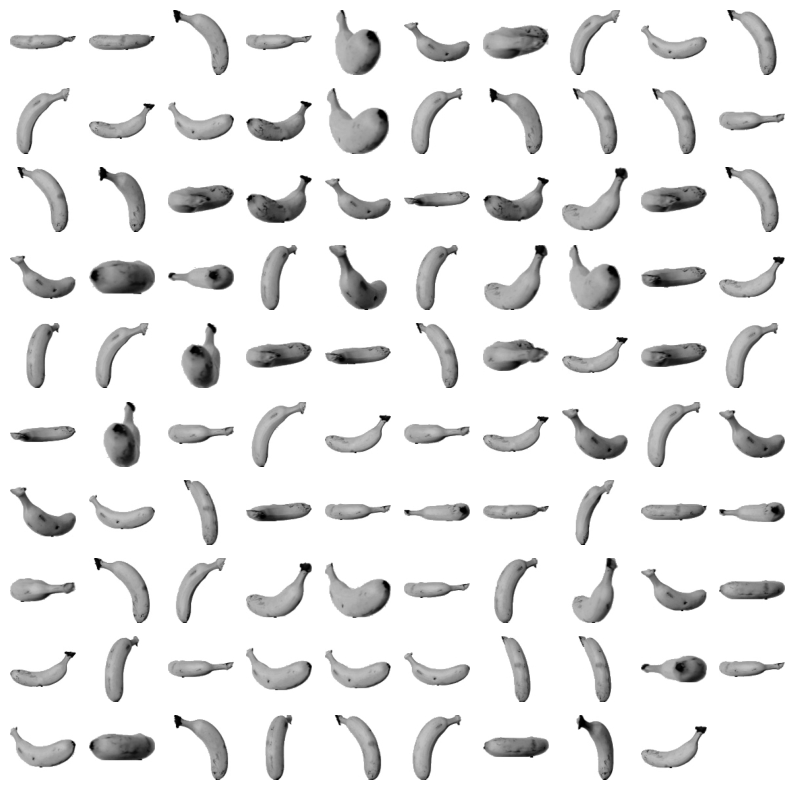

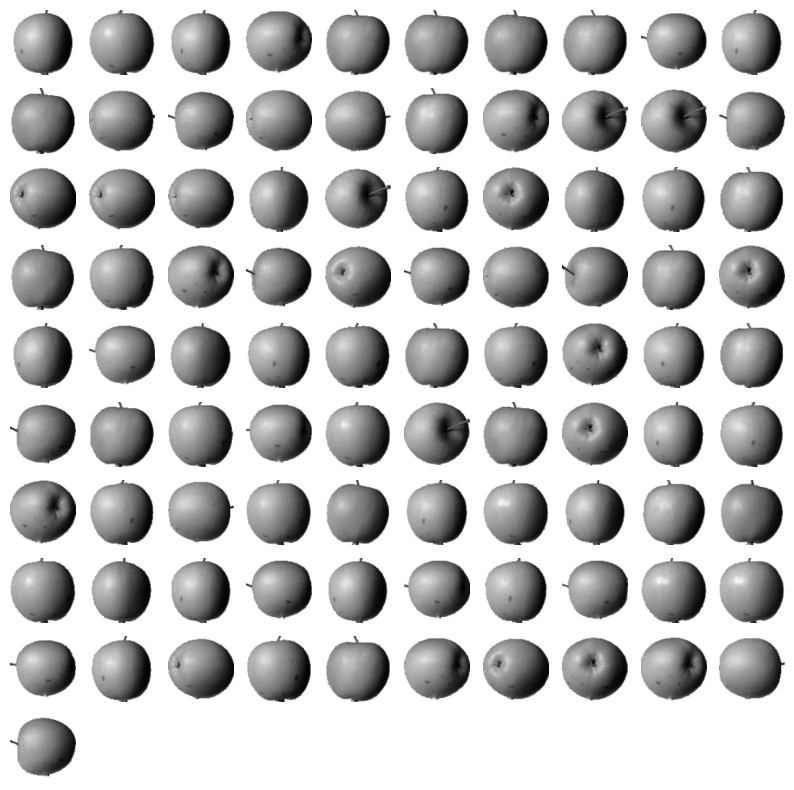

In [31]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print()

## 차원 축소된 데이터로 시각화

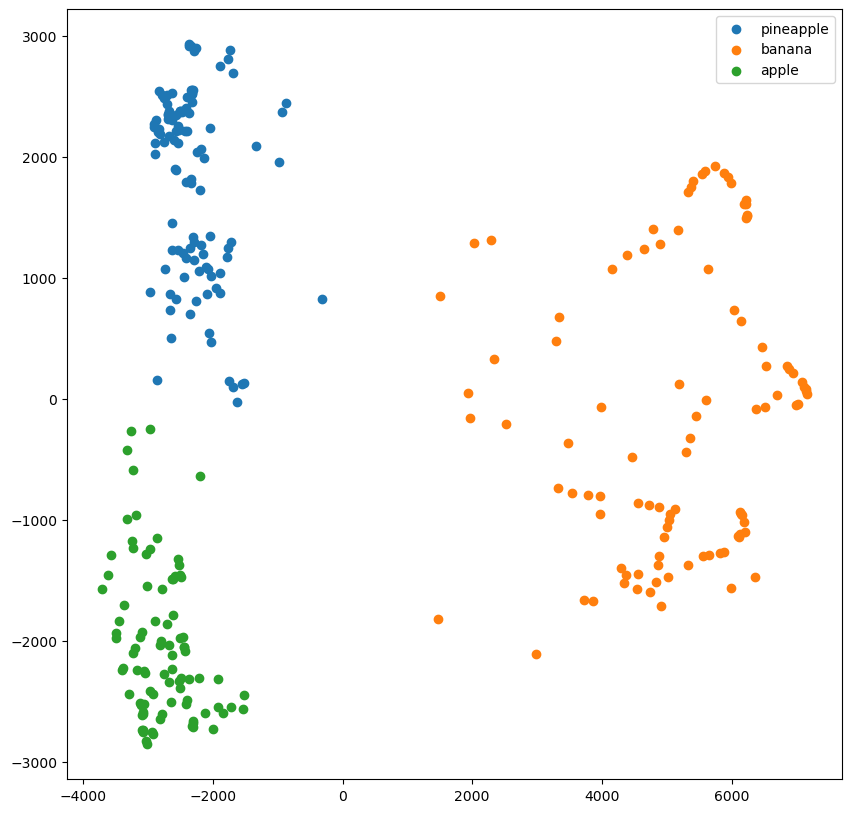

In [32]:
plt.figure(figsize = (10, 10))

for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.legend(["pineapple", "banana", "apple"])
plt.show()